In [140]:
#!/usr/bin/env python3
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import IPython.display
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
#Pipeline:
#0normalization
#0linear regression as our baseline

#1Baseline, take mean of the data points (MPG) to determine baseline
    #younes' suggestion when we predict using Total MPG
    #we might just ignore this then

#2Another thing to predict: rate of change of MPG, maybe how much we are accelerating
    #When velocity decreases, how fast are we decreasing by? (acceleration)
    #good idea to create a new parameter on rate of change of speed
    #rate of change of MPG as output - not sure
    

#3Generate test set using equation
    #need some clarification why
    #not useful -> likely quite simple and won't demonstrate the comptuational expensive problem 
    #that we are trying to calculate
    
    #useful -> why compare theoretical values when we have actual values?

#4Remove the features that don't really correlate with our MPG - i dont think that we need to do that

In [158]:
#NEW: write comments?
#OLD: aggregate the data points for five files into aggregate.csv. i have removed the time predictor from the data set

# cleaned, correct dataset - elaborate on "clean" pls
# cleaned: removed long term fuel trim bank 3,removed some of the
# time columns as well.
# merged all 6 data files with the same features
# also created function to cap instant fuel economy to 45 mpg if larger than 45
files = "./data/merged.csv"

raw_dataset = pd.read_csv(files, sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()

#remove whitespace in front of column name
dataset.columns = dataset.columns.str.lstrip()

In [ ]:
# TODO:
# add acceleration parameter
# see cost outputs with outliers removed

In [256]:
# Global parameters
max_num = 45
seed = 9
numEpochs = 500
cap_dataset = False # for testing purposes

In [258]:
#To-do: consider experimenting what happens when you remove it.
#if the maxNum = 45, there are ___1788___ obs whose MPG > 45

#a function that rounds down any value above 45 to 45.
#39 is the avg highway IFE. we then choose the number 45.
#see our doc/write up for more info?

def set_max_ife(dataset, max_num, wanted):
    #    count = 0
    if not wanted: return dataset
    copy = dataset.copy()
    for i in range(len(dataset.index)):
        if dataset.iloc[i, len(dataset.columns) - 1] > max_Num:
#            count += 1
            copy.iloc[i, len(dataset.columns) - 1] = max_Num
#    print(count)
    return copy
maxed_dataset = set_max_ife(dataset, max_num, False)
maxed_dataset.sample(frac=1).reset_index(drop=True)

,Absolute load value (%),Absolute throttle position (%),Ambient air temperature (F),Barometric pressure (inHg),Calculated load value (%),Commanded fuel rail pressure A (inHg),Engine coolant temperature (F),Engine RPM (RPM),Fuel level input (%),Fuel rail pressure (psi),Fuel/Air commanded equivalence ratio,Intake air temperature (F),Intake manifold absolute pressure (inHg),Long term fuel % trim - Bank 1 (%),Mass air flow rate (lb/min),Vehicle speed (MPH),Fuel rate (gal/hr),Instant fuel economy (MPG)
0,21.56863,9.411765,64.4,29.8254,15.29412,885.9030,183.2,1431.00,81.17647,632.3646,0.995276,68.0,5.906020,5.46875,0.066150,49.709690,0.044031,1128.966000
1,19.60784,11.764710,59.0,29.8254,33.72549,933.1512,185.0,575.75,89.41177,449.6170,0.904325,84.2,12.697940,-2.34375,0.281799,0.000000,0.206950,0.000000
2,41.56863,20.392160,59.0,29.8254,44.70588,1866.3020,183.2,1424.75,62.35294,894.8828,0.989481,93.2,25.100590,5.46875,1.496313,19.262510,1.007099,19.126730
3,25.09804,14.509800,64.4,29.8254,34.11765,1163.4860,186.8,1053.75,70.98039,552.5938,0.994666,73.4,16.832160,4.68750,0.493479,4.970970,0.330605,15.035980
4,79.21568,32.941180,59.0,29.8254,96.07843,2769.9230,185.0,1400.75,60.39216,1361.9040,0.994849,80.6,29.234800,5.46875,2.648646,39.767760,1.773799,22.419540
5,11.37255,11.764710,71.6,29.5301,13.72549,885.9030,188.6,1221.50,92.94118,443.8155,1.000003,80.6,5.906020,1.56250,0.211680,44.117360,0.155298,284.081300
6,10.98039,12.156860,62.6,29.5301,12.94118,885.9030,181.4,1477.50,50.19608,468.4719,1.000003,66.2,5.020117,1.56250,0.316197,22.990730,0.209994,109.482800
7,88.23529,47.843140,68.0,29.8254,99.60784,4429.5150,186.8,2001.25,78.03922,2208.9250,0.991921,68.0,29.234800,7.81250,3.430539,67.729460,2.294187,29.522210
8,10.58823,12.941180,62.6,29.8254,12.94118,885.9030,183.2,1797.75,78.03922,449.6170,1.000003,66.2,5.315418,8.59375,0.316197,62.758490,0.211692,296.461200
9,11.37255,12.941180,62.6,29.8254,12.54902,885.9030,183.2,2056.25,87.05882,459.7696,1.000003,64.4,5.020117,1.56250,0.433944,29.825820,0.288193,103.492700


In [200]:
#Plotting a histograph to see distribution of Vehicle speed (MPH) 
#sns.distplot(maxedDataSet['Vehicle speed (MPH)']);

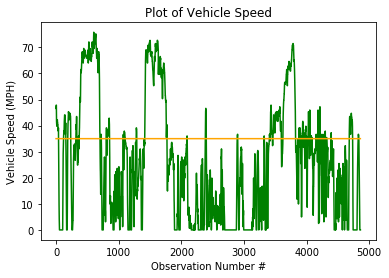

In [201]:
set35 = np.full(4859, 35)
set35
plt.plot(maxed_dataset['Vehicle speed (MPH)'], color='g')
plt.plot(set35, color='orange')
plt.xlabel('Observation Number #')
plt.ylabel('Vehicle Speed (MPH)')
plt.title('Plot of Vehicle Speed')
plt.figure(figsize=(36, 32))
plt.show()

In [202]:
#dataset.iloc[:, len(dataset.columns) - 3] #yes - way to access speed

#a function that counts how many data points are that whose speed is more than 35 
#(meaning that the car is in the highway)

def find_highway_speed(dataset, max_num):
    count = 0
    copy = dataset.copy()
    array_speed = []
    for i in range(len(dataset.index)):
        if dataset.iloc[i, len(dataset.columns) - 3] > max_num:
            count += 1
            array_speed.append(i)
    print(count)
    return array_speed

list_highway_speed = find_highway_speed(maxed_dataset, 35)

#for i in range(1,len(list_highway_speed))):
#    print(list_highway_speed[i])

1536


In [203]:
#print(list_highway_speed)
#for i in range(1,len(list_highway_speed))):
#    highway_speed_dataset = maxed_dataset[list_highway_speed[i]]


In [259]:
%%time 
#set seed here!

# Bugs to fix: split evenly driving on the high way vs city (look at speed for this)
# Split evenly the data amongst the datasets



#creating data and splitting and random shuffling
#https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test/38251213#38251213
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

np.random.seed(88)
train, validate, test = train_validate_test_split(maxed_dataset)

train_labels = train.pop("Instant fuel economy (MPG)")
validate_labels = validate.pop("Instant fuel economy (MPG)")
test_labels = test.pop("Instant fuel economy (MPG)")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.09 ms


In [260]:
#train.dtypes

In [262]:
train = train.apply(lambda col:pd.to_numeric(col, errors='coerce'))

# train_stats is a pandas data frame type
train_stats = train.describe(include = 'all')
train_stats

train_stats['Vehicle speed (MPH)']

count    2916.000000
mean       26.392081
std        22.091625
min         0.000000
25%         5.592341
50%        24.854850
75%        38.525010
max        75.807290
Name: Vehicle speed (MPH), dtype: float64

In [263]:
train_stats['Vehicle speed (MPH)'][1] #mean

26.392080833607682

In [264]:
#we have to normalize test and validation data set by using the mean and sd from training data set

# Even if we make our own, the values are similar but not exact. mine vs their mean and var
# issue: i am copying the set, find better way to not copy huge set
def getMean(column):
    sum = 0
    n = len(column)
    for i in range(n):
        sum += column.iloc[i]
    mean = sum / float(n)
    return mean

def getVariance(column, mean):
    squareMeanSum = 0
    n = len(column)
    for i in range(n):
        squareMeanSum += (column.iloc[i] - mean)**2
    var = math.sqrt(squareMeanSum / float(n))
    return var

# Normalize function from sklearn was buggy so we wrote our own
# Given a data set, normalize it and return the normalized data set
def normalizeSet(set):
    numRow = len(set.index)
    numCol = len(set.columns)
#     normed_set = set
    for col in range(numCol):
        column = set.iloc[:,col]
        mean = getMean(column)
        var = getVariance(column, mean)        
#         normalize each each value in a particular feature 
        for row in range(numRow):
            set.iloc[row, col] = float(set.iloc[row, col] - mean) / var
#             normed_set.iloc[row, col] = float(set.iloc[row, col] - mean) / var
#             print(set.iloc[row, col])
    return set
normed_train = normalizeSet(train)
normed_validate = normalizeSet(validate)
normed_test = normalizeSet(test)

In [265]:
#https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
#this method normalizes it according to the mean and sd from each set instead of 
#normalizaing from training set only# scaler = StandardScaler()

# a bit buggy
# normed_train = scaler.fit_transform(train)
# normed_validate = scaler.fit_transform(validate)
# normed_test = scaler.fit_transform(test)



In [266]:
# build models with different number of activation layers and number of nodes to explore
# which one has lowest testing error
def build_model_A():
  model = keras.Sequential([
    layers.Dense(5, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

def build_model_B():
  model = keras.Sequential([
    layers.Dense(20, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


In [267]:
%%time
model_A = build_model_A()
model_A.summary()
model_B = build_model_B()
model_B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 5)                 90        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 20)                360       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 21        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________
CPU times: user 219 ms, sys: 15.6 ms, total: 234 ms
Wall time: 239 ms


In [25]:
%%time
# Also buggy: 

#change batch size? try early stop - The patience parameter is the amount of epochs to check for improvement
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#history_object = model.fit(train, train_labels, epochs=100, verbose=2,
#         validation_data=(validate, validate_labels), callbacks=[early_stop])

history_object_A = model_A.fit(normed_train, train_labels, epochs=250, verbose=0,
         validation_data=(normed_validate, validate_labels))

Instructions for updating:
Use tf.cast instead.
CPU times: user 45.1 s, sys: 20.8 s, total: 1min 5s
Wall time: 27.9 s


In [268]:
%%time

# See where the error jumps on a particular example (maybe jumps when on high way or city)
history_object_B = model_B.fit(normed_train, train_labels, epochs=numEpochs, verbose=2,
         validation_data=(normed_validate, validate_labels))

Train on 2916 samples, validate on 972 samples
Epoch 1/500
 - 0s - loss: 8784.8307 - mean_absolute_error: 54.7184 - mean_squared_error: 8784.8311 - val_loss: 11263.4137 - val_mean_absolute_error: 56.5887 - val_mean_squared_error: 11263.4150
Epoch 2/500
 - 0s - loss: 8561.1131 - mean_absolute_error: 53.4718 - mean_squared_error: 8561.1143 - val_loss: 11027.3978 - val_mean_absolute_error: 55.5279 - val_mean_squared_error: 11027.3975
Epoch 3/500
 - 0s - loss: 8289.7979 - mean_absolute_error: 52.1911 - mean_squared_error: 8289.7988 - val_loss: 10697.4766 - val_mean_absolute_error: 54.2866 - val_mean_squared_error: 10697.4775
Epoch 4/500
 - 0s - loss: 7936.7359 - mean_absolute_error: 50.7084 - mean_squared_error: 7936.7354 - val_loss: 10277.3433 - val_mean_absolute_error: 52.7934 - val_mean_squared_error: 10277.3438
Epoch 5/500
 - 0s - loss: 7500.9042 - mean_absolute_error: 48.9282 - mean_squared_error: 7500.9038 - val_loss: 9773.0526 - val_mean_absolute_error: 50.9578 - val_mean_squared_er

Epoch 44/500
 - 0s - loss: 1802.4592 - mean_absolute_error: 19.0259 - mean_squared_error: 1802.4592 - val_loss: 3347.8197 - val_mean_absolute_error: 20.7894 - val_mean_squared_error: 3347.8201
Epoch 45/500
 - 0s - loss: 1789.8147 - mean_absolute_error: 18.9088 - mean_squared_error: 1789.8143 - val_loss: 3344.8921 - val_mean_absolute_error: 20.6410 - val_mean_squared_error: 3344.8923
Epoch 46/500
 - 0s - loss: 1780.4594 - mean_absolute_error: 18.6592 - mean_squared_error: 1780.4604 - val_loss: 3317.9234 - val_mean_absolute_error: 20.5596 - val_mean_squared_error: 3317.9233
Epoch 47/500
 - 0s - loss: 1766.0221 - mean_absolute_error: 18.6355 - mean_squared_error: 1766.0221 - val_loss: 3295.7594 - val_mean_absolute_error: 20.5173 - val_mean_squared_error: 3295.7598
Epoch 48/500
 - 0s - loss: 1753.6199 - mean_absolute_error: 18.5983 - mean_squared_error: 1753.6199 - val_loss: 3297.0788 - val_mean_absolute_error: 20.3753 - val_mean_squared_error: 3297.0796
Epoch 49/500
 - 0s - loss: 1744.874

Epoch 87/500
 - 0s - loss: 1508.9168 - mean_absolute_error: 15.8499 - mean_squared_error: 1508.9164 - val_loss: 2962.3448 - val_mean_absolute_error: 18.0667 - val_mean_squared_error: 2962.3452
Epoch 88/500
 - 0s - loss: 1504.6857 - mean_absolute_error: 15.7919 - mean_squared_error: 1504.6857 - val_loss: 2957.4820 - val_mean_absolute_error: 18.0186 - val_mean_squared_error: 2957.4822
Epoch 89/500
 - 0s - loss: 1500.7848 - mean_absolute_error: 15.7854 - mean_squared_error: 1500.7848 - val_loss: 2950.7117 - val_mean_absolute_error: 17.9719 - val_mean_squared_error: 2950.7119
Epoch 90/500
 - 0s - loss: 1498.1063 - mean_absolute_error: 15.7367 - mean_squared_error: 1498.1064 - val_loss: 2952.5905 - val_mean_absolute_error: 17.8885 - val_mean_squared_error: 2952.5901
Epoch 91/500
 - 0s - loss: 1492.0101 - mean_absolute_error: 15.7856 - mean_squared_error: 1492.0099 - val_loss: 2950.1164 - val_mean_absolute_error: 17.8401 - val_mean_squared_error: 2950.1169
Epoch 92/500
 - 0s - loss: 1490.461

Epoch 130/500
 - 0s - loss: 1372.8756 - mean_absolute_error: 14.5672 - mean_squared_error: 1372.8755 - val_loss: 2790.3418 - val_mean_absolute_error: 16.6368 - val_mean_squared_error: 2790.3416
Epoch 131/500
 - 0s - loss: 1375.1398 - mean_absolute_error: 14.2786 - mean_squared_error: 1375.1395 - val_loss: 2775.6857 - val_mean_absolute_error: 16.5968 - val_mean_squared_error: 2775.6858
Epoch 132/500
 - 0s - loss: 1369.5640 - mean_absolute_error: 14.5094 - mean_squared_error: 1369.5640 - val_loss: 2766.1833 - val_mean_absolute_error: 16.6061 - val_mean_squared_error: 2766.1841
Epoch 133/500
 - 0s - loss: 1366.8008 - mean_absolute_error: 14.4589 - mean_squared_error: 1366.8005 - val_loss: 2759.9084 - val_mean_absolute_error: 16.6444 - val_mean_squared_error: 2759.9084
Epoch 134/500
 - 0s - loss: 1364.4830 - mean_absolute_error: 14.5276 - mean_squared_error: 1364.4829 - val_loss: 2758.2048 - val_mean_absolute_error: 16.6151 - val_mean_squared_error: 2758.2051
Epoch 135/500
 - 0s - loss: 13

Epoch 173/500
 - 0s - loss: 1281.7695 - mean_absolute_error: 13.8931 - mean_squared_error: 1281.7697 - val_loss: 2652.3600 - val_mean_absolute_error: 15.8464 - val_mean_squared_error: 2652.3601
Epoch 174/500
 - 0s - loss: 1281.5606 - mean_absolute_error: 13.7870 - mean_squared_error: 1281.5605 - val_loss: 2640.6145 - val_mean_absolute_error: 15.7706 - val_mean_squared_error: 2640.6150
Epoch 175/500
 - 0s - loss: 1278.9405 - mean_absolute_error: 13.8566 - mean_squared_error: 1278.9406 - val_loss: 2631.9290 - val_mean_absolute_error: 15.8146 - val_mean_squared_error: 2631.9287
Epoch 176/500
 - 0s - loss: 1277.1179 - mean_absolute_error: 13.8736 - mean_squared_error: 1277.1179 - val_loss: 2647.0308 - val_mean_absolute_error: 15.8581 - val_mean_squared_error: 2647.0310
Epoch 177/500
 - 0s - loss: 1274.9458 - mean_absolute_error: 13.7091 - mean_squared_error: 1274.9462 - val_loss: 2629.8176 - val_mean_absolute_error: 15.7246 - val_mean_squared_error: 2629.8179
Epoch 178/500
 - 0s - loss: 12

Epoch 216/500
 - 0s - loss: 1205.7168 - mean_absolute_error: 13.2559 - mean_squared_error: 1205.7164 - val_loss: 2541.2929 - val_mean_absolute_error: 15.1310 - val_mean_squared_error: 2541.2930
Epoch 217/500
 - 0s - loss: 1203.6811 - mean_absolute_error: 13.2938 - mean_squared_error: 1203.6810 - val_loss: 2559.4591 - val_mean_absolute_error: 15.2345 - val_mean_squared_error: 2559.4590
Epoch 218/500
 - 0s - loss: 1201.5313 - mean_absolute_error: 13.2447 - mean_squared_error: 1201.5315 - val_loss: 2570.1677 - val_mean_absolute_error: 15.2731 - val_mean_squared_error: 2570.1677
Epoch 219/500
 - 0s - loss: 1203.4964 - mean_absolute_error: 13.1286 - mean_squared_error: 1203.4966 - val_loss: 2559.9594 - val_mean_absolute_error: 15.1942 - val_mean_squared_error: 2559.9595
Epoch 220/500
 - 0s - loss: 1200.4070 - mean_absolute_error: 13.2012 - mean_squared_error: 1200.4067 - val_loss: 2564.3379 - val_mean_absolute_error: 15.2389 - val_mean_squared_error: 2564.3379
Epoch 221/500
 - 0s - loss: 11

Epoch 259/500
 - 0s - loss: 1136.7551 - mean_absolute_error: 12.7726 - mean_squared_error: 1136.7550 - val_loss: 2459.0855 - val_mean_absolute_error: 14.7754 - val_mean_squared_error: 2459.0852
Epoch 260/500
 - 0s - loss: 1136.1907 - mean_absolute_error: 12.5753 - mean_squared_error: 1136.1906 - val_loss: 2440.9743 - val_mean_absolute_error: 14.5884 - val_mean_squared_error: 2440.9746
Epoch 261/500
 - 0s - loss: 1132.7701 - mean_absolute_error: 12.7475 - mean_squared_error: 1132.7701 - val_loss: 2446.7948 - val_mean_absolute_error: 14.8452 - val_mean_squared_error: 2446.7949
Epoch 262/500
 - 0s - loss: 1129.9338 - mean_absolute_error: 12.7524 - mean_squared_error: 1129.9338 - val_loss: 2472.0715 - val_mean_absolute_error: 14.8375 - val_mean_squared_error: 2472.0718
Epoch 263/500
 - 0s - loss: 1133.6604 - mean_absolute_error: 12.4975 - mean_squared_error: 1133.6602 - val_loss: 2441.4416 - val_mean_absolute_error: 14.5714 - val_mean_squared_error: 2441.4412
Epoch 264/500
 - 0s - loss: 11

Epoch 302/500
 - 0s - loss: 1073.3788 - mean_absolute_error: 12.2463 - mean_squared_error: 1073.3787 - val_loss: 2374.8710 - val_mean_absolute_error: 14.5224 - val_mean_squared_error: 2374.8701
Epoch 303/500
 - 0s - loss: 1070.6142 - mean_absolute_error: 12.2419 - mean_squared_error: 1070.6145 - val_loss: 2373.2930 - val_mean_absolute_error: 14.5125 - val_mean_squared_error: 2373.2932
Epoch 304/500
 - 0s - loss: 1071.5105 - mean_absolute_error: 12.1295 - mean_squared_error: 1071.5106 - val_loss: 2382.2822 - val_mean_absolute_error: 14.6730 - val_mean_squared_error: 2382.2827
Epoch 305/500
 - 0s - loss: 1069.0908 - mean_absolute_error: 12.1172 - mean_squared_error: 1069.0908 - val_loss: 2364.9514 - val_mean_absolute_error: 14.2612 - val_mean_squared_error: 2364.9514
Epoch 306/500
 - 0s - loss: 1065.0056 - mean_absolute_error: 12.2685 - mean_squared_error: 1065.0050 - val_loss: 2383.9245 - val_mean_absolute_error: 14.5153 - val_mean_squared_error: 2383.9246
Epoch 307/500
 - 0s - loss: 10

Epoch 345/500
 - 0s - loss: 1012.9303 - mean_absolute_error: 11.7009 - mean_squared_error: 1012.9304 - val_loss: 2273.0726 - val_mean_absolute_error: 13.9635 - val_mean_squared_error: 2273.0725
Epoch 346/500
 - 0s - loss: 1009.0662 - mean_absolute_error: 11.7792 - mean_squared_error: 1009.0665 - val_loss: 2285.7578 - val_mean_absolute_error: 14.0541 - val_mean_squared_error: 2285.7578
Epoch 347/500
 - 0s - loss: 1009.5996 - mean_absolute_error: 11.6456 - mean_squared_error: 1009.5997 - val_loss: 2266.2610 - val_mean_absolute_error: 13.9722 - val_mean_squared_error: 2266.2610
Epoch 348/500
 - 0s - loss: 1006.3021 - mean_absolute_error: 11.7694 - mean_squared_error: 1006.3021 - val_loss: 2288.6779 - val_mean_absolute_error: 14.3127 - val_mean_squared_error: 2288.6777
Epoch 349/500
 - 0s - loss: 1007.1876 - mean_absolute_error: 11.6855 - mean_squared_error: 1007.1875 - val_loss: 2284.6574 - val_mean_absolute_error: 14.1998 - val_mean_squared_error: 2284.6577
Epoch 350/500
 - 0s - loss: 10

Epoch 388/500
 - 0s - loss: 954.7231 - mean_absolute_error: 11.2601 - mean_squared_error: 954.7231 - val_loss: 2203.3027 - val_mean_absolute_error: 13.7300 - val_mean_squared_error: 2203.3027
Epoch 389/500
 - 0s - loss: 955.2919 - mean_absolute_error: 11.1786 - mean_squared_error: 955.2917 - val_loss: 2195.1385 - val_mean_absolute_error: 13.5919 - val_mean_squared_error: 2195.1384
Epoch 390/500
 - 0s - loss: 952.6475 - mean_absolute_error: 11.1894 - mean_squared_error: 952.6475 - val_loss: 2196.4404 - val_mean_absolute_error: 13.7372 - val_mean_squared_error: 2196.4402
Epoch 391/500
 - 0s - loss: 949.5954 - mean_absolute_error: 11.2291 - mean_squared_error: 949.5953 - val_loss: 2210.1717 - val_mean_absolute_error: 13.7552 - val_mean_squared_error: 2210.1721
Epoch 392/500
 - 0s - loss: 949.7145 - mean_absolute_error: 11.1888 - mean_squared_error: 949.7148 - val_loss: 2226.3994 - val_mean_absolute_error: 14.1113 - val_mean_squared_error: 2226.3992
Epoch 393/500
 - 0s - loss: 948.3976 - m

Epoch 431/500
 - 0s - loss: 899.9024 - mean_absolute_error: 10.7661 - mean_squared_error: 899.9023 - val_loss: 2149.0675 - val_mean_absolute_error: 13.5264 - val_mean_squared_error: 2149.0676
Epoch 432/500
 - 0s - loss: 898.2130 - mean_absolute_error: 10.8173 - mean_squared_error: 898.2132 - val_loss: 2140.0662 - val_mean_absolute_error: 13.4614 - val_mean_squared_error: 2140.0664
Epoch 433/500
 - 0s - loss: 897.4203 - mean_absolute_error: 10.7802 - mean_squared_error: 897.4204 - val_loss: 2128.5473 - val_mean_absolute_error: 13.5654 - val_mean_squared_error: 2128.5474
Epoch 434/500
 - 0s - loss: 896.5246 - mean_absolute_error: 10.6784 - mean_squared_error: 896.5246 - val_loss: 2093.3349 - val_mean_absolute_error: 13.1702 - val_mean_squared_error: 2093.3350
Epoch 435/500
 - 0s - loss: 894.3547 - mean_absolute_error: 10.8178 - mean_squared_error: 894.3547 - val_loss: 2106.7456 - val_mean_absolute_error: 13.3209 - val_mean_squared_error: 2106.7456
Epoch 436/500
 - 0s - loss: 894.1677 - m

Epoch 474/500
 - 0s - loss: 845.1383 - mean_absolute_error: 10.3093 - mean_squared_error: 845.1382 - val_loss: 2068.7774 - val_mean_absolute_error: 13.1479 - val_mean_squared_error: 2068.7773
Epoch 475/500
 - 0s - loss: 847.2318 - mean_absolute_error: 10.1774 - mean_squared_error: 847.2318 - val_loss: 2056.8915 - val_mean_absolute_error: 12.9779 - val_mean_squared_error: 2056.8914
Epoch 476/500
 - 0s - loss: 844.4638 - mean_absolute_error: 10.1760 - mean_squared_error: 844.4636 - val_loss: 2048.6506 - val_mean_absolute_error: 13.0704 - val_mean_squared_error: 2048.6504
Epoch 477/500
 - 0s - loss: 844.9278 - mean_absolute_error: 10.1108 - mean_squared_error: 844.9276 - val_loss: 2033.1520 - val_mean_absolute_error: 12.8210 - val_mean_squared_error: 2033.1520
Epoch 478/500
 - 0s - loss: 839.2759 - mean_absolute_error: 10.3136 - mean_squared_error: 839.2761 - val_loss: 2101.3707 - val_mean_absolute_error: 13.4134 - val_mean_squared_error: 2101.3708
Epoch 479/500
 - 0s - loss: 841.4768 - m

In [283]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,30])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.xlim([0,500])
  plt.ylim([0, 8000])
  plt.legend()
  plt.show()

In [ ]:
plot_history(history_object_A)

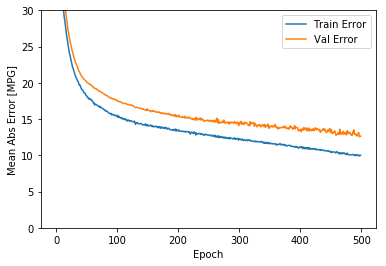

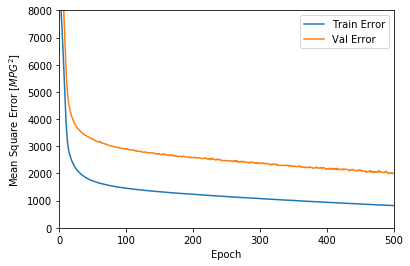

In [284]:
# Increase num epochs? in reference to 2nd graph
# Mean abs error seems to be a better cost function

# For Mean Abs,the variance starts to in|crease after epoch 200, maybe stop there?
# For Mean Square, the variance start to increase after epoch 150, stop here?

# Mean Squared Error seems to be industry standard for regression problems. 
plot_history(history_object_B)

In [271]:
# Range of how wrong we allow a prediction to be, random number for now. 
# unsure what is considered "good"
# discussion: what is a good epsilon value

# errorVec is y - y_hat, abs value will be taken care of inside here
def accuracy(errorVec, epsilon):
    numExamples = len(errorVec)
    numCorrect = 0
    for error in errorVec:
        if abs(error) <= epsilon:
            numCorrect += 1
    print("Accuracy with epsilon {}:".format(epsilon), (numCorrect / float(numExamples))*100,"%")

In [273]:
# Increased accuracy to 42% after cleaning data and setting maxed IFO
# Epoch is set to 500
epsilon = 1
test_predictions_B = model_B.predict(normed_test).flatten()
test_labels_np = test_labels.values
errorVec = test_predictions_B - test_labels_np
print(max(test_predictions_B))
accuracy(errorVec, epsilon)

368.85986
Accuracy with epsilon 1: 11.522633744855968 %


In [277]:
# implementing linear regression 
# build linear model
# TODO: implement linear regression with predictions capped and without predictions capped
# are we also editting our predictions?
lm = LinearRegression()

# the data was editting so that the max IFO is 45
model = lm.fit(normed_train, train_labels)
predictions = lm.predict(normed_test) # this is a np array, be careful
print(max(predictions))

# expects series
def cap_predictions(predictions, max_num):
    copy = np.copy(predictions)
    for index, val in enumerate(copy):
        if val > max_num:
            copy[index] = max_num
        if val < 0:
            copy[index] = 0
    return copy
capped_predictions = cap_predictions(predictions, max_num)

191.39420928307382


In [275]:
# Linear Regression plot
# lots of weird looking outliers at true values = 0, 45

def plot_scatter(y, y_hat):
    
    plt.figure
    plt.scatter(y, y_hat)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

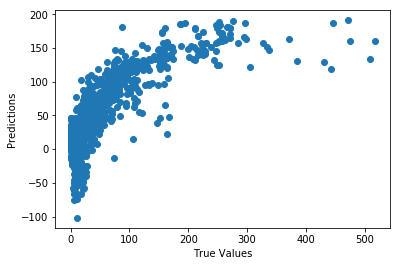

In [276]:
# prediction no cap
plot_scatter(test_labels, predictions)

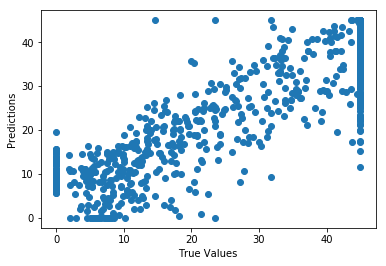

In [243]:
# prediction with cap
plot_scatter(test_labels, capped_predictions)

In [244]:
# Accuracy of linear regression

accuracy(test_labels - predictions, epsilon)
accuracy(test_labels - capped_predictions, epsilon)

Accuracy:  7.510288065843622 %
Accuracy:  18.51851851851852 %
